In [1]:
import numpy as np
import json
import lightgbm as lgb
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import matplotlib.pylab as plt

In [2]:
data = pd.read_csv('exp3.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 81 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   index                  80000 non-null  int64 
 1   queueId                80000 non-null  int64 
 2   mapId                  80000 non-null  int64 
 3   seasonId               80000 non-null  int64 
 4   team1_win              80000 non-null  int64 
 5   team1_firstBlood       80000 non-null  bool  
 6   team1_firstTower       80000 non-null  bool  
 7   team1_firstInhibitor   80000 non-null  bool  
 8   team1_firstBaron       80000 non-null  bool  
 9   team1_firstDragon      80000 non-null  bool  
 10  team1_firstRiftHerald  80000 non-null  bool  
 11  player1_championId     80000 non-null  int64 
 12  player1_kills          80000 non-null  int64 
 13  player1_deaths         80000 non-null  int64 
 14  player1_assists        80000 non-null  int64 
 15  player1_goldEarned 

In [4]:
data.head()

,index,queueId,mapId,seasonId,team1_win,team1_firstBlood,team1_firstTower,team1_firstInhibitor,team1_firstBaron,team1_firstDragon,...,player9_goldEarned,player9_role,player9_lane,player10_championId,player10_kills,player10_deaths,player10_assists,player10_goldEarned,player10_role,player10_lane
0,0,420,11,13,0,True,False,False,False,False,...,6967,DUO_SUPPORT,NONE,157,3,0,8,8168,DUO,NONE
1,1,420,11,13,1,False,True,True,False,True,...,8133,SOLO,MIDDLE,555,3,7,4,6943,DUO_SUPPORT,BOTTOM
2,2,420,11,13,0,False,True,False,False,True,...,11868,DUO_CARRY,BOTTOM,122,2,2,1,9685,SOLO,TOP
3,3,420,11,13,0,True,False,False,False,True,...,6703,DUO_SUPPORT,BOTTOM,23,6,2,10,13109,SOLO,TOP
4,4,420,11,13,1,True,True,True,False,False,...,6823,DUO,MIDDLE,25,5,7,8,6809,DUO_SUPPORT,BOTTOM


In [5]:
data.drop(columns=['index','mapId','seasonId'],axis=1,inplace=True)
data.head()

,queueId,team1_win,team1_firstBlood,team1_firstTower,team1_firstInhibitor,team1_firstBaron,team1_firstDragon,team1_firstRiftHerald,player1_championId,player1_kills,...,player9_goldEarned,player9_role,player9_lane,player10_championId,player10_kills,player10_deaths,player10_assists,player10_goldEarned,player10_role,player10_lane
0,420,0,True,False,False,False,False,False,107,2,...,6967,DUO_SUPPORT,NONE,157,3,0,8,8168,DUO,NONE
1,420,1,False,True,True,False,True,True,76,10,...,8133,SOLO,MIDDLE,555,3,7,4,6943,DUO_SUPPORT,BOTTOM
2,420,0,False,True,False,False,True,True,51,7,...,11868,DUO_CARRY,BOTTOM,122,2,2,1,9685,SOLO,TOP
3,420,0,True,False,False,False,True,False,28,5,...,6703,DUO_SUPPORT,BOTTOM,23,6,2,10,13109,SOLO,TOP
4,420,1,True,True,True,False,False,True,79,4,...,6823,DUO,MIDDLE,25,5,7,8,6809,DUO_SUPPORT,BOTTOM


In [6]:
data.columns

Index(['queueId', 'team1_win', 'team1_firstBlood', 'team1_firstTower',
       'team1_firstInhibitor', 'team1_firstBaron', 'team1_firstDragon',
       'team1_firstRiftHerald', 'player1_championId', 'player1_kills',
       'player1_deaths', 'player1_assists', 'player1_goldEarned',
       'player1_role', 'player1_lane', 'player2_championId', 'player2_kills',
       'player2_deaths', 'player2_assists', 'player2_goldEarned',
       'player2_role', 'player2_lane', 'player3_championId', 'player3_kills',
       'player3_deaths', 'player3_assists', 'player3_goldEarned',
       'player3_role', 'player3_lane', 'player4_championId', 'player4_kills',
       'player4_deaths', 'player4_assists', 'player4_goldEarned',
       'player4_role', 'player4_lane', 'player5_championId', 'player5_kills',
       'player5_deaths', 'player5_assists', 'player5_goldEarned',
       'player5_role', 'player5_lane', 'player6_championId', 'player6_kills',
       'player6_deaths', 'player6_assists', 'player6_goldEarned',


In [7]:
for index in data.columns:
    if 'Id' in index:
        data[index] = data[index].astype('object')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 78 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   queueId                80000 non-null  object
 1   team1_win              80000 non-null  int64 
 2   team1_firstBlood       80000 non-null  bool  
 3   team1_firstTower       80000 non-null  bool  
 4   team1_firstInhibitor   80000 non-null  bool  
 5   team1_firstBaron       80000 non-null  bool  
 6   team1_firstDragon      80000 non-null  bool  
 7   team1_firstRiftHerald  80000 non-null  bool  
 8   player1_championId     80000 non-null  object
 9   player1_kills          80000 non-null  int64 
 10  player1_deaths         80000 non-null  int64 
 11  player1_assists        80000 non-null  int64 
 12  player1_goldEarned     80000 non-null  int64 
 13  player1_role           80000 non-null  object
 14  player1_lane           80000 non-null  object
 15  player2_championId 

In [8]:
number_col = [col for col in data.columns if data[col].dtype == 'int64']
category_col = [col for col in data.columns if data[col].dtype != 'int64']
print(len(number_col))
print(len(category_col))
print(number_col)

41
37
['team1_win', 'player1_kills', 'player1_deaths', 'player1_assists', 'player1_goldEarned', 'player2_kills', 'player2_deaths', 'player2_assists', 'player2_goldEarned', 'player3_kills', 'player3_deaths', 'player3_assists', 'player3_goldEarned', 'player4_kills', 'player4_deaths', 'player4_assists', 'player4_goldEarned', 'player5_kills', 'player5_deaths', 'player5_assists', 'player5_goldEarned', 'player6_kills', 'player6_deaths', 'player6_assists', 'player6_goldEarned', 'player7_kills', 'player7_deaths', 'player7_assists', 'player7_goldEarned', 'player8_kills', 'player8_deaths', 'player8_assists', 'player8_goldEarned', 'player9_kills', 'player9_deaths', 'player9_assists', 'player9_goldEarned', 'player10_kills', 'player10_deaths', 'player10_assists', 'player10_goldEarned']


In [9]:
LE = LabelEncoder()
for col in category_col:
    data[col]=LE.fit_transform(data[col])
data.head()

,queueId,team1_win,team1_firstBlood,team1_firstTower,team1_firstInhibitor,team1_firstBaron,team1_firstDragon,team1_firstRiftHerald,player1_championId,player1_kills,...,player9_goldEarned,player9_role,player9_lane,player10_championId,player10_kills,player10_deaths,player10_assists,player10_goldEarned,player10_role,player10_lane
0,0,0,1,0,0,0,0,0,90,2,...,6967,2,3,114,3,0,8,8168,0,3
1,0,1,0,1,1,0,1,1,66,10,...,8133,4,2,146,3,7,4,6943,2,0
2,0,0,0,1,0,0,1,1,47,7,...,11868,1,0,101,2,2,1,9685,4,4
3,0,0,1,0,0,0,1,0,27,5,...,6703,2,0,22,6,2,10,13109,4,4
4,0,1,1,1,1,0,0,1,69,4,...,6823,0,2,24,5,7,8,6809,2,0


In [10]:
df_label = pd.read_csv('label.csv')
label = df_label['gameDuration'].values
print(label)

[1671 1227 1458 ... 1612 1351 2534]


In [11]:
# train,test是所有数据的的数据集,label是已知label
train = data.iloc[20000:,:].values
test = data.iloc[:20000,:].values

In [12]:
from sklearn.model_selection import train_test_split
# 构造训练集和验证集
x_train, x_test, y_train, y_test = train_test_split(train,label,test_size=0.2,shuffle=True)
print(x_train.shape)
print(x_test.shape)

(48000, 78)
(12000, 78)


In [13]:
# LGBM简单回归验证测试
LGBMR=lgb.LGBMRegressor()
LGBMR.fit(x_train,y_train)
y_pred = LGBMR.predict(x_test)
print(f'mean square error is :{mean_squared_error(y_test,y_pred)}')
print(f'max error:{max(abs(np.array(y_pred)-np.array(y_test)))}')

mean square error is :4870.4165796934885
max error:456.7819769532134


In [14]:
# LGBM调参验证测试
evals_result = {}
classfeats = []
for x in category_col:
    classfeats.append(data.columns.get_loc(x))
# print(classfeats)
lgb_train = lgb.Dataset(x_train, y_train)
lgb_eval = lgb.Dataset(x_test, y_test, reference=lgb_train)

params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'mse',
    'max_depth': 15,
    'num_leaves': 20,
    'learning_rate': 0.01,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0,
}

gbm = lgb.train(params,
                lgb_train,
                num_boost_round=8000,
                valid_sets=lgb_eval,
                verbose_eval=10,
                evals_result=evals_result,
                # categorical_feature = classfeats,
                early_stopping_rounds=10)

y_pred = gbm.predict(x_test, num_iteration=gbm.best_iteration)
# 评估
print(f'mean square error is :{mean_squared_error(y_test,y_pred)}')
print(f'max error:{max(abs(np.array(y_pred)-np.array(y_test)))}')


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008138 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 172770
[20]	valid_0's l2: 148269
[30]	valid_0's l2: 127789
[40]	valid_0's l2: 110361
[50]	valid_0's l2: 95799.5
[60]	valid_0's l2: 83340.6
[70]	valid_0's l2: 72924.4
[80]	valid_0's l2: 63879.8
[90]	valid_0's l2: 56259.8
[100]	valid_0's l2: 49735.6
[110]	valid_0's l2: 44248
[120]	valid_0's l2: 39717.4
[130]	valid_0's l2: 35536.6
[140]	valid_0's l2: 32014.7
[150]	valid_0's l2: 28949.3
[160]	valid_0's l2: 26346.2
[170]	valid_0's l2: 23998
[180]	valid_0's l2: 22046.6
[190]	valid_0's l2: 20239.3
[200]	valid_0's l2: 18667.9
[210]	valid_0's l2: 17412.4
[220]	valid_0's l2: 16170.4
[230]	valid_0's l2: 15137.7
[240]	valid_0's l2: 14234.9
[250]	valid_0's l2: 13437.2
[260]	valid_0's l2: 12734.7

[2810]	valid_0's l2: 3546.16
[2820]	valid_0's l2: 3544.37
[2830]	valid_0's l2: 3543.32
[2840]	valid_0's l2: 3541.15
[2850]	valid_0's l2: 3538.97
[2860]	valid_0's l2: 3536.9
[2870]	valid_0's l2: 3535.21
[2880]	valid_0's l2: 3534.29
[2890]	valid_0's l2: 3532.1
[2900]	valid_0's l2: 3530.85
[2910]	valid_0's l2: 3529.63
[2920]	valid_0's l2: 3528.31
[2930]	valid_0's l2: 3526.77
[2940]	valid_0's l2: 3525.59
[2950]	valid_0's l2: 3524.29
[2960]	valid_0's l2: 3522.65
[2970]	valid_0's l2: 3521.34
[2980]	valid_0's l2: 3519.83
[2990]	valid_0's l2: 3518.52
[3000]	valid_0's l2: 3516.94
[3010]	valid_0's l2: 3516.19
[3020]	valid_0's l2: 3514.69
[3030]	valid_0's l2: 3513.08
[3040]	valid_0's l2: 3512.74
[3050]	valid_0's l2: 3511.18
[3060]	valid_0's l2: 3509.79
[3070]	valid_0's l2: 3508.96
[3080]	valid_0's l2: 3508.01
[3090]	valid_0's l2: 3506.45
[3100]	valid_0's l2: 3504.48
[3110]	valid_0's l2: 3503
[3120]	valid_0's l2: 3501.86
[3130]	valid_0's l2: 3500.86
[3140]	valid_0's l2: 3499.45
[3150]	valid_0's l2

验证集均方误差...


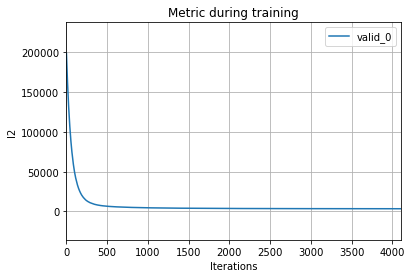

画出特征重要度...


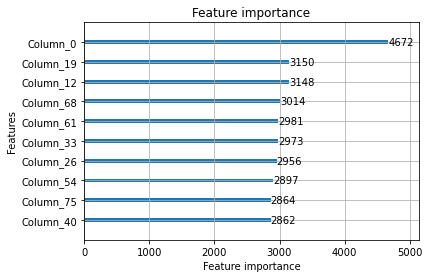

In [15]:
print('验证集均方误差...')
ax = lgb.plot_metric(evals_result)
plt.show()

print('画出特征重要度...')
ax = lgb.plot_importance(gbm, max_num_features=10)
plt.show()

In [16]:
# LGBM给出测试集结果
result = gbm.predict(test)
df_result = pd.DataFrame(columns=['gameDuration'])
df_result['gameDuration'] = result
# df_result.head()
df_result.to_csv(' 晏瑞然_PB19000196_exp4_1.csv',index=True,index_label='Index')

In [17]:
# XGBOOST
import xgboost as xgb
data_matrix = xgb.DMatrix(train,label)
xg_reg= xgb.XGBRegressor(
    objective='reg:linear',
    colsample_bytree=0.3,
    learning_rate=0.1,
    max_depth=15,
    num_boost_round=1000,
    alpha=10
)
xg_reg.fit(x_train,y_train)
pred = xg_reg.predict(x_test)
mean_squared_error(pred,y_test)

[11:59:46] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[11:59:46] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




6791.05233814394

In [18]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 15, 'alpha': 10}
cv_results = xgb.cv(dtrain=data_matrix, params=params, nfold=3,
                    num_boost_round=1000,early_stopping_rounds=10,metrics="rmse", as_pandas=True)
cv_results.head()

[12:00:14] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[12:00:14] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[12:00:14] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,1522.253174,1.180732,1522.427043,2.222049
1,1372.648519,1.057081,1373.045207,1.956634
2,1238.136434,1.061750,1238.869385,1.438573
3,1116.946655,1.067894,1117.862956,0.974516
4,1008.261475,1.639836,1009.393880,0.105849


In [19]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)
RFR_pred = RFR.predict(x_test)
print(f'mean square error is :{mean_squared_error(y_test,RFR_pred)}')
print(f'max error:{max(abs(np.array(RFR_pred)-np.array(y_test)))}')

mean square error is :8371.993635675
max error:640.52


In [20]:
# 第二次LGBM训练
params2 = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'mse',
    'max_depth': 10,
    'num_leaves': 30,
    'learning_rate': 0.01,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0,
}

gbm2 = lgb.train(params2,
                lgb_train,
                num_boost_round=8000,
                valid_sets=lgb_eval,
                verbose_eval=10,
                evals_result=evals_result,
                # categorical_feature = classfeats,
                early_stopping_rounds=10)

y_pred2 = gbm2.predict(x_test, num_iteration=gbm2.best_iteration)
# 评估
print(f'mean square error is :{mean_squared_error(y_test,y_pred2)}')
print(f'max error:{max(abs(np.array(y_pred2)-np.array(y_test)))}')

result = gbm2.predict(test)
df_result = pd.DataFrame(columns=['gameDuration'])
df_result['gameDuration'] = result
# df_result.head()
df_result.to_csv(' 晏瑞然_PB19000196_exp4_2.csv',index=True,index_label='Index')

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018821 seconds.
You can set `force_col_wise=true` to remove the overhead.
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 171869
[20]	valid_0's l2: 146724
[30]	valid_0's l2: 125713
[40]	valid_0's l2: 107987
[50]	valid_0's l2: 93075.5
[60]	valid_0's l2: 80479.1
[70]	valid_0's l2: 69897.3
[80]	valid_0's l2: 60805.5
[90]	valid_0's l2: 53147.7
[100]	valid_0's l2: 46539.7
[110]	valid_0's l2: 41043.5
[120]	valid_0's l2: 36510.7
[130]	valid_0's l2: 32432.2
[140]	valid_0's l2: 28983.6
[150]	valid_0's l2: 26034.7
[160]	valid_0's l2: 23589.3
[170]	valid_0's l2: 21459.9
[180]	valid_0's l2: 19644.1
[190]	valid_0's l2: 18044.1
[200]	valid_0's l2: 16667.4
[210]	valid_0's l2: 15498.2
[220]	valid_0's l2: 14422.5
[230]	valid_0's l2: 13496.2
[240]	valid_0's l2: 12713.8
[250]	valid_0's l2: 12013.6
[260]	valid_0's l2: 11384
[270]	valid_0's l2: 10827.8
[280]	valid_0's l2: 10315.3
[290]

[2850]	valid_0's l2: 3449.79
[2860]	valid_0's l2: 3448.64
[2870]	valid_0's l2: 3447.16
[2880]	valid_0's l2: 3446.36
[2890]	valid_0's l2: 3445.15
[2900]	valid_0's l2: 3443.91
[2910]	valid_0's l2: 3441.56
[2920]	valid_0's l2: 3440.55
[2930]	valid_0's l2: 3439.22
[2940]	valid_0's l2: 3437.91
[2950]	valid_0's l2: 3436.29
[2960]	valid_0's l2: 3434.59
[2970]	valid_0's l2: 3433.97
[2980]	valid_0's l2: 3433.29
[2990]	valid_0's l2: 3432.45
[3000]	valid_0's l2: 3431.38
[3010]	valid_0's l2: 3430.56
[3020]	valid_0's l2: 3429.34
[3030]	valid_0's l2: 3427.82
[3040]	valid_0's l2: 3427.56
[3050]	valid_0's l2: 3426.23
[3060]	valid_0's l2: 3424.43
[3070]	valid_0's l2: 3423.48
[3080]	valid_0's l2: 3422.58
[3090]	valid_0's l2: 3421.4
[3100]	valid_0's l2: 3420.19
[3110]	valid_0's l2: 3419.69
[3120]	valid_0's l2: 3418.38
[3130]	valid_0's l2: 3417.38
[3140]	valid_0's l2: 3415.04
[3150]	valid_0's l2: 3413.83
[3160]	valid_0's l2: 3412.8
[3170]	valid_0's l2: 3411.61
[3180]	valid_0's l2: 3410.55
[3190]	valid_0's